### Gym
OpenAI, uma empresa sem fins lucrativos para pesquisa sobre inteligência artificial, possui uma caixa de ferramentas que permite desenvolver e comparar algoritmos de Aprendizado por Reforço (Reinforced Learning), um dos pilares das pesquisas modernas sobre aprendizado de máquina. 

A biblioteca Gym oferece um conjunto fácil de usar de tarefas de aprendizado por reforço. Gym é um kit de ferramentas para desenvolver e comparar algoritmos de aprendizagem por reforço. Ele oferece suporte ao ensino de agentes, desde caminhar até jogar jogos como Pong ou Pinball. Interface de código aberto para tarefas de aprendizagem de reforço.

A biblioteca Gym é uma coleção de problemas de teste - environments - que você pode usar para desenvolver seus algoritmos de aprendizado por reforço. Esses ambientes possuem uma interface compartilhada, permitindo que você escreva algoritmos gerais.



### Instalação

Para começar, você precisa ter instalado o Python 3.5+. Para isso, basta instalar gym usando pip:

#### pip install gym

Você também pode executar pip install -e .[all] para realizar uma instalação completa contendo todos os ambientes. Isso requer a instalação de várias dependências mais envolvidas, incluindo cmake uma versão recente do pip.

### Ambientes

Aqui está um exemplo simples de como fazer algo funcionar. Isso executará uma instância do ambiente CartPole-v0 por 1000 etapas de tempo, renderizando o ambiente em cada etapa. Ao executar este código, você deverá ver uma janela pop-up exibindo o problema clássico cart-pole:

In [4]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) #faça uma ação aleatória
env.close()

Caso queira ver alguns outros ambientes em ação, tente substituir CartPole-v0 acima por algo como MountainCar-v0, MsPacman-v0(requer a dependência Atari ) ou Hopper-v1(requer as dependências MuJoCo ). Todos os ambientes descendem da classe base Env.

Observe que se estiver faltando alguma dependência, você deverá receber uma mensagem de erro informando o que está faltando.

### Observações

Caso queira fazer melhor do que realizar ações aleatórias em cada etapa, provavelmente o ideal é saber o que nossas ações estão causando ao meio ambiente.

A função step do ambiente retorna exatamente o que precisamos. Na verdade, step retorna quatro valores. Esses são:

observation(objeto): um objeto específico do ambiente que representa sua observação do ambiente. Por exemplo, dados de pixel de uma câmera, ângulos e velocidades de articulação de um robô ou o estado do tabuleiro em um jogo de tabuleiro.

reward(float): quantidade de recompensa alcançada pela ação anterior. A escala varia entre os ambientes, mas o objetivo é sempre aumentar sua recompensa total.

done(booleano): se é hora de voltar ao ambiente. A maioria das tarefas (mas não todas) é dividida em episódios bem definidos, done = True indica que o episódio terminou. (Por exemplo, talvez o mastro esteja muito inclinado ou você tenha perdido sua última vida).

info(dict): informações de diagnóstico úteis para depuração. Às vezes, pode ser útil para o aprendizado (por exemplo, pode conter as probabilidades brutas por trás da última mudança de estado do ambiente). No entanto, as avaliações oficiais do seu agente não têm permissão para usar isso para aprendizagem.



Abaixo, uma implementação do clássico “loop agente-ambiente”. A cada passo de tempo, o agente escolhe um action e o ambiente retorna um observation e uma reward.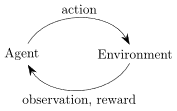
O processo é iniciado chamando reset(), que retorna uma inicial observation. Abaixo, uma maneira adequada de escrever o código anterior seria respeitar uma sinalização done:

In [6]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 0.02695217 -0.00751533  0.03770692  0.00806924]
[ 0.02680186 -0.2031572   0.03786831  0.31240664]
[ 0.02273872 -0.39879759  0.04411644  0.61678747]
[ 0.01476276 -0.20431883  0.05645219  0.33831918]
[ 0.01067639 -0.40019674  0.06321857  0.64825613]
[ 0.00267245 -0.20600983  0.07618369  0.37613152]
[-0.00144774 -0.01204795  0.08370633  0.10840894]
[-0.0016887  -0.20826345  0.0858745   0.4262826 ]
[-0.00585397 -0.40449009  0.09440016  0.74475402]
[-0.01394377 -0.60077923  0.10929524  1.06558925]
[-0.02595936 -0.40725992  0.13060702  0.80911118]
[-0.03410456 -0.60390651  0.14678924  1.13985819]
[-0.04618269 -0.41097622  0.16958641  0.89657619]
[-0.05440221 -0.21850881  0.18751793  0.66163637]
[-0.05877239 -0.41567645  0.20075066  1.00701104]
Episode finished after 15 timesteps
[-0.03333469  0.03145578  0.00270875 -0.04673466]
[-0.03270557 -0.16370491  0.00177405  0.24680167]
[-0.03597967 -0.35885215  0.00671009  0.54004364]
[-0.04315671 -0.16382516  0.01751096  0.24948249]
[-0.04643321 -

[ 0.02722533  0.3759016  -0.12026639 -0.7307211 ]
[ 0.03474337  0.18262892 -0.13488081 -0.47817933]
[ 0.03839594  0.37937157 -0.14444439 -0.81014772]
[ 0.04598338  0.57614588 -0.16064735 -1.14455451]
[ 0.05750629  0.77295941 -0.18353844 -1.48300097]
Episode finished after 27 timesteps
[ 0.01734775  0.03888     0.00540134 -0.03196445]
[ 0.01812535 -0.15631899  0.00476205  0.26241775]
[ 0.01499897 -0.35150859  0.01001041  0.55659887]
[ 0.0079688  -0.54676964  0.02114238  0.85241878]
[-0.00296659 -0.74217334  0.03819076  1.15167422]
[-0.01781006 -0.54756992  0.06122424  0.87120729]
[-0.02876146 -0.74346875  0.07864839  1.18249367]
[-0.04363083 -0.93951826  0.10229826  1.49875769]
[-0.0624212  -1.13572359  0.13227342  1.82155033]
[-0.08513567 -0.94229584  0.16870442  1.57271828]
[-0.10398159 -0.74954016  0.20015879  1.33705371]
Episode finished after 11 timesteps
[0.04044169 0.03056344 0.02493522 0.01744132]
[ 0.04105296  0.22531908  0.02528404 -0.26727113]
[0.04555934 0.02984558 0.0199386

[ 0.10048816  0.00990997 -0.14833127 -0.38408665]
[ 0.10068636  0.20679222 -0.156013   -0.71961676]
[ 0.10482221  0.40368916 -0.17040533 -1.05705707]
[ 0.11289599  0.21118425 -0.19154648 -0.82233909]
[ 0.11711968  0.01912639 -0.20799326 -0.59549204]
Episode finished after 21 timesteps
[-0.00994284  0.02211236  0.00325631  0.00283166]
[-0.00950059  0.21718746  0.00331294 -0.28882209]
[-0.00515684  0.41226201 -0.0024635  -0.58045831]
[ 0.0030884   0.21717466 -0.01407267 -0.28855245]
[ 0.00743189  0.02225619 -0.01984372 -0.00034091]
[ 0.00787702  0.21765702 -0.01985053 -0.29921813]
[ 0.01223016  0.02282357 -0.0258349  -0.0128612 ]
[ 0.01268663 -0.17191853 -0.02609212  0.27155986]
[ 0.00924826  0.02356583 -0.02066092 -0.02923709]
[ 0.00971957  0.21897789 -0.02124567 -0.3283665 ]
[ 0.01409913  0.41439575 -0.027813   -0.6276729 ]
[ 0.02238705  0.60989463 -0.04036645 -0.92898376]
[ 0.03458494  0.41534017 -0.05894613 -0.64925431]
[ 0.04289174  0.61123156 -0.07193121 -0.95990119]
[ 0.05511637  

### Espaços

Os exemplos acima, mostram ações aleatórias do espaço de ação do ambiente. Mas o que realmente são essas ações? Cada ambiente vem com um action_spacee e um observation_space. Esses atributos são do tipo Space e descrevem o formato de ações e observações válidas:

In [7]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


O espaço Discrete permite um intervalo fixo de números não negativos, portanto, neste caso, actions válidas são 0 ou 1. O espaço Box representa uma caixa n-dimensional, portanto, as observações válidas serão uma matriz de 4 números. Também podemos verificar os limites do Box:

In [8]:
print(env.observation_space.high)
#> array([ 2.4       ,         inf,  0.20943951,         inf])
print(env.observation_space.low)
#> array([-2.4       ,        -inf, -0.20943951,        -inf])

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


Esta introspecção pode ser útil para escrever código genérico que funcione para muitos ambientes diferentes. Box e Discrete são os Spaces mais comuns. Caso queira obter uma amostra de um Space ou verificar se algo pertence a ele:

In [9]:
from gym import spaces
space = spaces.Discrete(8) # Conjunto com 8 elementos {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8

### Ambientes Disponíveis

O Gym vem com um conjunto diversificado de ambientes que variam de fáceis a difíceis e envolvem muitos tipos diferentes de dados. Veja a lista completa de ambientes para obter uma visão panorâmica.

Classic control e toy text: tarefas completas de pequena escala, principalmente da literatura RL. Elas já estão aqui para você começar a usar.
   
Algorithmic: execute cálculos, como adicionar números com vários dígitos e reverter sequências. Pode-se observar que essas tarefas são fáceis para um computador. O desafio é aprender esses algoritmos puramente a partir de exemplos. Essas tarefas têm a boa propriedade de que é fácil variar a dificuldade variando o comprimento da sequência.

Atari: jogue jogos clássicos do Atari. Integramos o Ambiente de Aprendizagem Arcade (que teve um grande impacto na pesquisa de aprendizagem por reforço) de uma forma fácil de instalar .

2D e 3D robots: controlar um robô em simulação. Essas tarefas usam o mecanismo de física MuJoCo, que foi projetado para simulação de robôs rápida e precisa. Estão incluídos alguns ambientes recentes benchmark feito por pesquisadores da UC Berkeley. MuJoCo é um software proprietário, mas oferece licenças de teste gratuitas.


### O registro

O principal objetivo do Gym é fornecer uma grande coleção de ambientes que expõem uma interface comum e são versionados para permitir comparações. Para listar os ambientes disponíveis em sua instalação, basta perguntar gym.envs.registry:

In [10]:
from gym import envs
print(envs.registry.all())
#> [EnvSpec(DoubleDunk-v0), EnvSpec(InvertedDoublePendulum-v0), EnvSpec(BeamRider-v0), EnvSpec(Phoenix-ram-v0), EnvSpec(Asterix-v0), EnvSpec(TimePilot-v0), EnvSpec(Alien-v0), EnvSpec(Robotank-ram-v0), EnvSpec(CartPole-v0), EnvSpec(Berzerk-v0), EnvSpec(Berzerk-ram-v0), EnvSpec(Gopher-ram-v0), ...

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

Isso lhe dará uma lista de objetos EnvSpec. Eles definem parâmetros para uma tarefa específica, incluindo o número de tentativas a serem executadas e o número máximo de etapas. Por exemplo, EnvSpec(Hopper-v1) define um ambiente onde o objetivo é fazer com que um robô simulado em 2D salte; EnvSpec(Go9x9-v0)define um jogo Go em um tabuleiro 9x9.

Esses IDs de ambiente são tratados como strings opacas. Para garantir comparações válidas para o futuro, os ambientes nunca serão alterados de uma forma que afete o desempenho, apenas substituídos por versões mais recentes. Atualmente, o sufixo de cada ambiente é denominado como v0 para que as substituições futuras possam, naturalmente, ser chamadas de v1, v2, etc.

É muito fácil adicionar seus próprios ambientes ao registro, e assim disponibilizá-los para gym.make(): apenas register()eles no momento do carregamento.

Contexto: Por que criar o Gym? (2016)

Aprendizado por reforço (RL) é o subcampo do aprendizado de máquina relacionado à tomada de decisão e ao controle motor. Ele estuda como um agente pode aprender como atingir objetivos em um ambiente complexo e incerto. É emocionante por dois motivos:

RL é muito geral, abrangendo todos os problemas que envolvem a tomada de uma sequência de decisões: por exemplo, controlar os motores de um robô para que ele seja capaz de correr e pular , tomar decisões de negócios como preços e gerenciamento de estoque ou jogar videogames e jogos de tabuleiro . A RL pode até ser aplicada a problemas de aprendizagem supervisionada com saídas sequenciais ou estruturadas .

Os algoritmos RL começaram a obter bons resultados em muitos ambientes difíceis. RL tem uma longa história, mas até os avanços recentes no aprendizado profundo, ele exigia muita engenharia específica para o problema. 

No entanto, a pesquisa de RL apresenta algumas dificuldades por dois fatores:

A necessidade de melhores benchmarks. Na aprendizagem supervisionada, o progresso tem sido impulsionado por grandes conjuntos de dados rotulados como ImageNet . Em RL, o equivalente mais próximo seria uma coleção grande e diversificada de ambientes. No entanto, as coleções de código aberto existentes de ambientes RL não têm variedade suficiente, e muitas vezes são difíceis de configurar e usar.

Falta de padronização dos ambientes utilizados nas publicações. Diferenças sutis na definição do problema, como a função de recompensa ou o conjunto de ações, podem alterar drasticamente a dificuldade de uma tarefa. Este problema torna difícil reproduzir pesquisas publicadas e comparar resultados de diferentes artigos.

O Gym é uma tentativa de corrigir esse dois problemas.